In [202]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

## k-means: Toy Data

In [203]:
## STEP 1: Convert text file to vectors
with open('toydata.txt', 'r') as file:
    #lines = [line.rstrip() for line in file]
    lines = [line.strip() for line in file]

vectors = []

for i in range(len(lines)):
    for j in range(len(lines[i])):
        if lines[i][j] == ' ':
            coord1 = float(lines[i][:j])
            coord2 = float(lines[i][j:])
            vectors.append(np.array([coord1, coord2]))
            break

In [204]:
x = vectors
k = 3
N = 500


In [205]:
all_Js = []
for q in range(20):
    #initialize gamma and m vectors
    ms = np.ndarray((k, 2))
    for i in range(k):
        index = random.randint(0, N - 1)
        ms[i] = x[index]

    gammas = np.zeros(N, dtype=int)
    for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j

    cont = True
    Js = []
    while cont:

        #Calculate Clusters C and distortion J
        C = []
        for i in range(k):
            C_i = []
            C.append(C_i)

        for i in range(N):
            g = gammas[i]
            C[g].append(x[i])

        for j in range(k):
            len_Cj = len(C[j])
            ms[j] = (1/len_Cj)
            sum = 0
            for i in range(len_Cj):
                sum = sum + C[j][i]
            ms[j] = ms[j]*sum

            #update gammas then m
        for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j
            
        J = 0.0
        for i in range(N):
            g = gammas[i]
            d = np.linalg.norm(x[i] - ms[g])**2
            J = J + d
        
        if len(Js) > 0 and np.linalg.norm(J - Js[-1]) < 1:
            Js.append(J)
            cont = False
        Js.append(J)
    all_Js.append(Js)

        




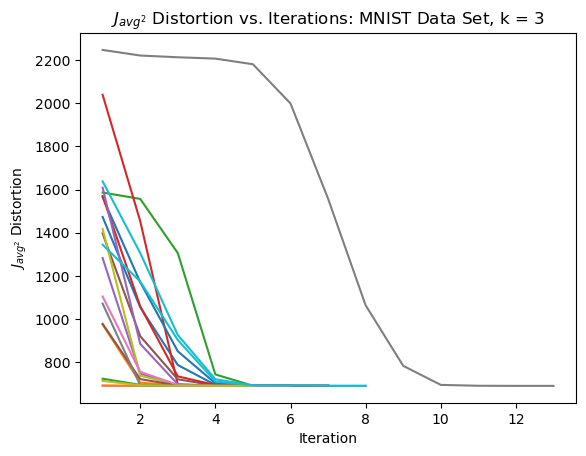

In [206]:
fig, ax = plt.subplots()
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: MNIST Data Set, k = 3")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

for q in range(20):
    num_iter = len(all_Js[q])
    Ts = np.arange(num_iter) + 1
    ax.plot(Ts, all_Js[q])

Text(0, 0.5, 'y')

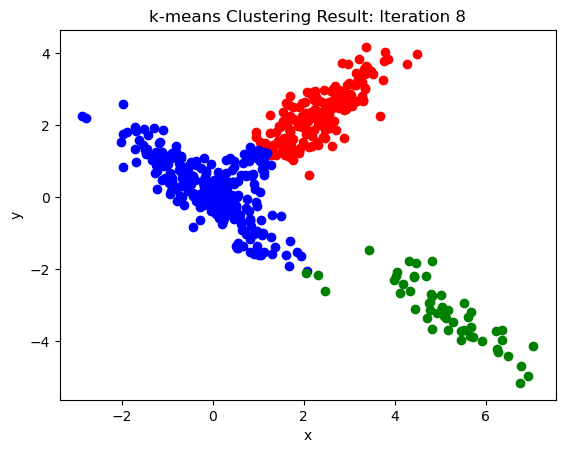

In [207]:
#Plotting the last result
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for i in range(k):
    for j in range(len(C[i])):
        x_j1 = C[i][j][0]
        x_j2 = C[i][j][1]
        ax.scatter(x_j1, x_j2, color=colors[i])
ax.set_title(f"k-means Clustering Result: Iteration {Ts[-1]}")
ax.set_xlabel("x")
ax.set_ylabel("y")

## k-means++: Toy Data

In [208]:
def D(p, xj, m):
    """
    Calculates D for kmeans++
    p is the max index of centroid which xj is being compared against
    xj is the vector being checked against the centroid
    m is the vector of centroids
    """
    minimum = np.Inf
    for i in range(p + 1):
        cur_norm = np.linalg.norm(xj - m[i])
        if cur_norm < minimum:
            minimum = cur_norm
    return minimum

In [209]:
all_Jpps = []
for q in range(20):
    #STEP 1: Initialize m[0] randomly, and use kmeans++ to find the others
    a = random.sample(x, 1)[0]
    ms[0] = a

    for i in range(2):
        P = []
        for j in range(N):
            num = D(i, x[j], ms)**2
            denom = 0
            for l in range(N):
                denom = denom + D(i, x[l], ms)**2
            P.append(num/denom)
        P_sum = [P[0]]
        for q in range(1, len(P)):
            P_sum.append(P_sum[q - 1] + P[q])
        m_index = np.random.choice(range(N), p=P)
        ms[i + 1] = x[m_index]

    gammas = np.zeros(N, dtype=int)
    for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j

    cont = True
    Js = []
    while cont:

        #Calculate Clusters C and distortion J
        C = []
        for i in range(k):
            C_i = []
            C.append(C_i)

        for i in range(N):
            g = gammas[i]
            C[g].append(x[i])

        for j in range(k):
            len_Cj = len(C[j])
            ms[j] = (1/len_Cj)
            sum = 0
            for i in range(len_Cj):
                sum = sum + C[j][i]
            ms[j] = ms[j]*sum

            #update gammas then m
        for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j
            
        J = 0.0
        for i in range(N):
            g = gammas[i]
            d = np.linalg.norm(x[i] - ms[g])**2
            J = J + d
        
        if len(Js) > 0 and np.linalg.norm(J - Js[-1]) < 1:
            Js.append(J)
            cont = False
        Js.append(J)
    all_Jpps.append(Js)

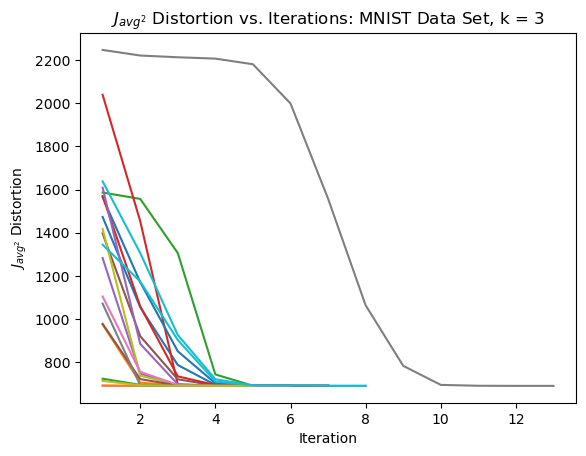

In [210]:
fig, ax = plt.subplots()
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: MNIST Data Set, k = 3")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

for q in range(20):
    num_iter = len(all_Js[q])
    Ts = np.arange(num_iter) + 1
    ax.plot(Ts, all_Js[q])

In [211]:
#Compare kmeans to kmeans++
flat_Jpp = []
flat_J = []
flat_Tpp = []
flat_T = []

for i in range(len(all_Jpps)):
    for j in range(len(all_Jpps[i])):
        flat_Jpp.append(all_Jpps[i][j])
    flat_Tpp.append(len(all_Jpps[i]))

for i in range(len(all_Js)):
    for j in range(len(all_Js[i])):
        flat_J.append(all_Js[i][j])
    flat_T.append(len(all_Js[i]))

avg_J = np.average(flat_J)
std_J = np.std(flat_J)
med_J = np.median(flat_J)
avg_T = np.average(flat_T)

avg_Jpp = np.average(flat_Jpp)
std_Jpp = np.std(flat_Jpp)
med_Jpp = np.median(flat_Jpp)
avg_Tpp = np.average(flat_Tpp)

round_to = 2

print(f"Average distortion for k-means: {round(avg_J, round_to)}")
print(f"Standard deviation of distortion for k-means: {round(std_J, round_to)}")
print(f"Median distortion for k-means: {round(med_J, round_to)}")
print(f"Average required iterations for k-means: {avg_T}\n")

print(f"Average distortion for k-means++: {round(avg_Jpp, round_to)}")
print(f"Standard deviation of distortion for k-means++: {round(std_Jpp, round_to)}")
print(f"Median distortion for k-means++: {round(med_Jpp, round_to)}")
print(f"Average required iterations for k-means++: {avg_Tpp}")

Average distortion for k-means: 899.9
Standard deviation of distortion for k-means: 396.01
Median distortion for k-means: 692.64
Average required iterations for k-means: 6.5

Average distortion for k-means++: 841.52
Standard deviation of distortion for k-means++: 294.71
Median distortion for k-means++: 692.05
Average required iterations for k-means++: 5.95
